## Exploratory Data Analysis-11
https://drive.google.com/file/d/1xzZLGMpELgwVTB7eKmvUoEKK7uXC0YVF/view?usp=sharing

In [ ]:
# # Shape of the dataset
# df.shape

# # Checking noise values
# for i in df.columns:
#     print(i,'\n', df[i].sort_values().unique())
    
# # Checking null values
# df.isnull().sum()

# # Checking duplicates
# df[df.duplicated()==True]

# # Checking data types
# df.dtypes

# # 5-point summary
# df.describe()

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Reading the dataset
df=pd.read_csv('E:/Exploratory_Data_Analysis/EDA_11_Sales_data.csv')

In [4]:
# 1.	Load the dataset and display the first 5 rows. What is the shape of the dataset?
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [5]:
df.shape

(185950, 11)

In [6]:
# 2.	Check for missing values in each column. If there are missing values, handle them appropriately.
df.isnull().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [7]:
# 3.	Convert the 'Order Date' column to a datetime format. Then, create a line plot showing the trend of orders over time (month/year).
df.dtypes
df['Order Date']=pd.to_datetime(df['Order Date'])

In [10]:
# Extracting monthly and yearly orders
monthly_orders = df.groupby(df['Order Date'].dt.to_period('M'))['Quantity Ordered'].sum().to_frame()
#yearly_orders = df.groupby(df['Order Date'].dt.to_period('Y'))['Quantity Ordered'].sum()
monthly_orders

,Quantity Ordered
Order Date,
2019-01,10862
2019-02,13449
2019-03,17005
2019-04,20558
2019-05,18667
2019-06,15253
2019-07,16072
2019-08,13448
2019-09,13109


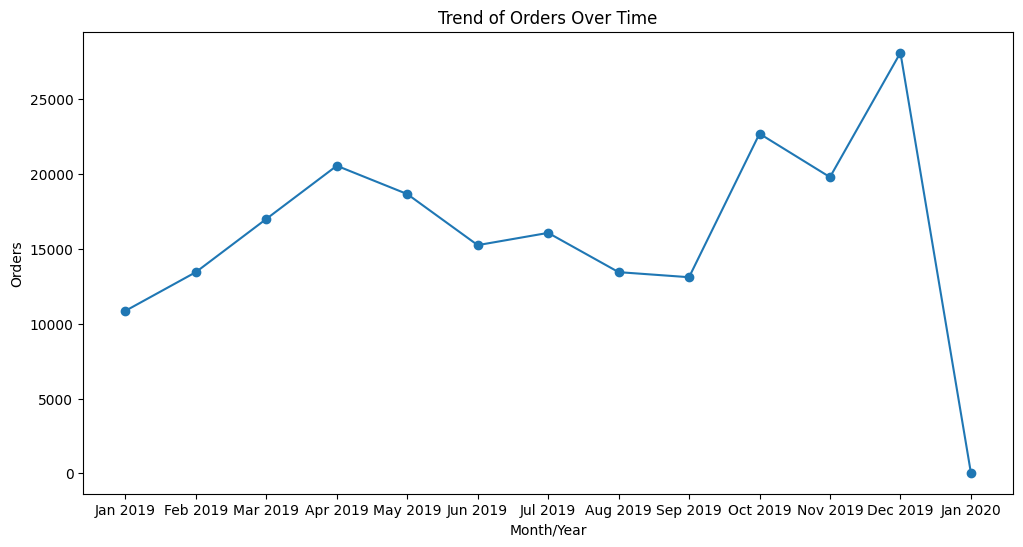

In [13]:
# Converted PeriodIndex to strings
#monthly_orders.index = monthly_orders.index.strftime('%b %Y')

# Line plot
plt.figure(figsize=(12, 6))  
plt.plot(monthly_orders.index, monthly_orders['Quantity Ordered'], marker='o', linestyle='-')
plt.title('Trend of Orders Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Orders')
plt.show()

In [14]:
# 4.	Calculate the total turnover for each category. Display the results in a bar chart.
x4=df.groupby('catégorie')['turnover'].sum().to_frame()
x4

,turnover
catégorie,
Alimentation,8612544.53
Sports,8670290.44
Vêtements,8601579.46
Électronique,8607621.54


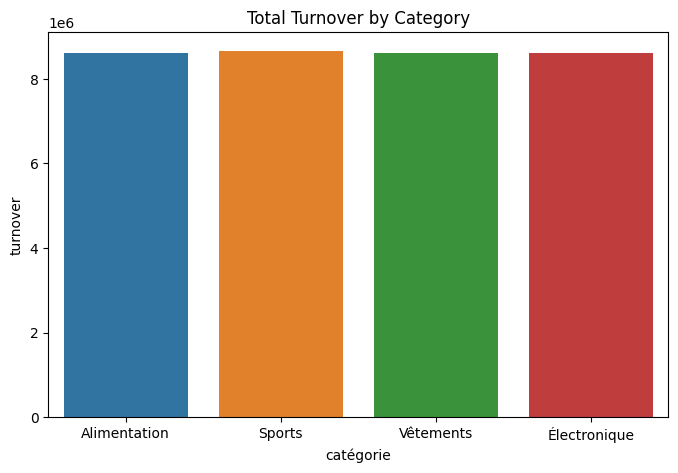

In [83]:
# Bar plot -using seaborn
plt.figure(figsize=(8,5))  
sns.barplot(x4,x=x4.index, y=x4['turnover'])
plt.title('Total Turnover by Category')
plt.xlabel('Category')
plt.ylabel('Turnover')
plt.show()

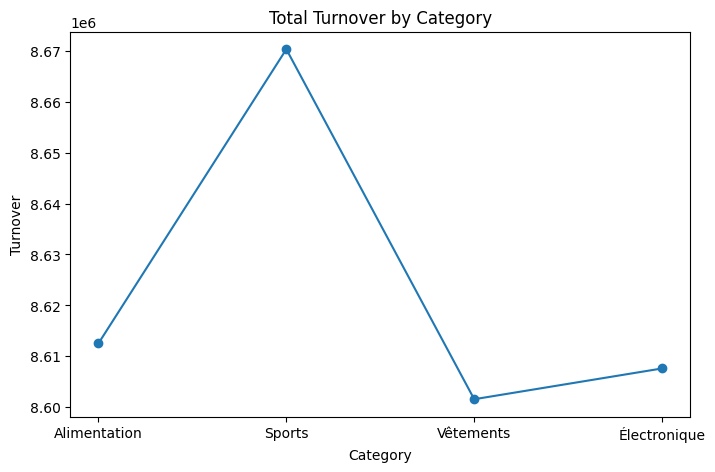

In [15]:
# Line plot -using matplotlib
plt.figure(figsize=(8,5))  
plt.plot(x4.index, x4['turnover'], marker='o', linestyle='-')
plt.title('Total Turnover by Category')
plt.xlabel('Category')
plt.ylabel('Turnover')
plt.show()

In [29]:
# 5.	Identify the top 5 products by quantity ordered. Create a horizontal bar chart to visualize this information.

x5=df.groupby('Product')['Quantity Ordered'].sum().reset_index()
res5=x5.sort_values('Quantity Ordered', ascending=False).head()
res5

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


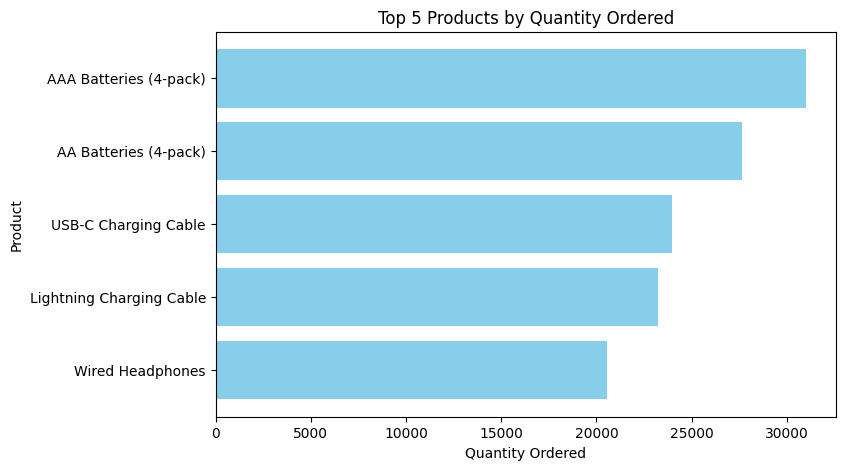

In [38]:
# Horizontal bar chart -using matplotlib
plt.figure(figsize=(8,5))
plt.barh(res5['Product'], res5['Quantity Ordered'], color='skyblue')
plt.title('Top 5 Products by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.gca().invert_yaxis()  # Inverted the y-axis to display the highest quantity at the top
plt.show()

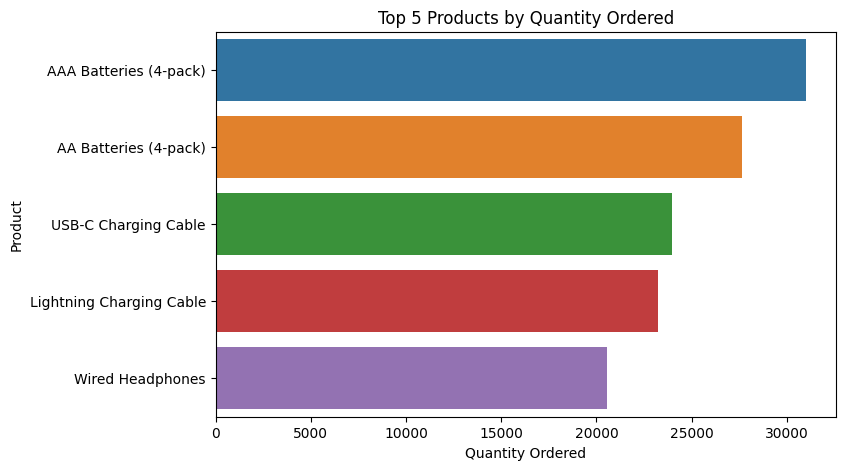

In [39]:
# Horizontal bar chart -using seaborn
plt.figure(figsize=(8,5))
sns.barplot(res5, y=res5['Product'], x=res5['Quantity Ordered'], orient='h')
plt.title('Top 5 Products by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()

In [45]:
# 6.	Compute summary statistics (mean, median, std, min, max) for the 'Price Each' column.
df['Price Each'].describe().to_frame()

,Price Each
count,185950.000000
mean,184.399735
std,332.731330
min,2.990000
25%,11.950000
50%,14.950000
75%,150.000000
max,1700.000000


In [48]:
# 7.	Calculate the total turnover for each month in the dataset. Create a line plot to visualize the monthly turnover.

# Extracted the month and year from the 'Order Date' column
x7=df.copy()
x7['Month'] = x7['Order Date'].dt.strftime('%Y-%m')

# Calculated the total turnover for each month
monthly_turnover=x7.groupby('Month')['turnover'].sum().reset_index()
monthly_turnover 

,Month,turnover
0,2019-01,1813586.44
1,2019-02,2202022.42
2,2019-03,2807100.38
3,2019-04,3390670.24
4,2019-05,3152606.75
5,2019-06,2577802.26
6,2019-07,2647775.76
7,2019-08,2244467.88
8,2019-09,2097560.13
9,2019-10,3736726.88


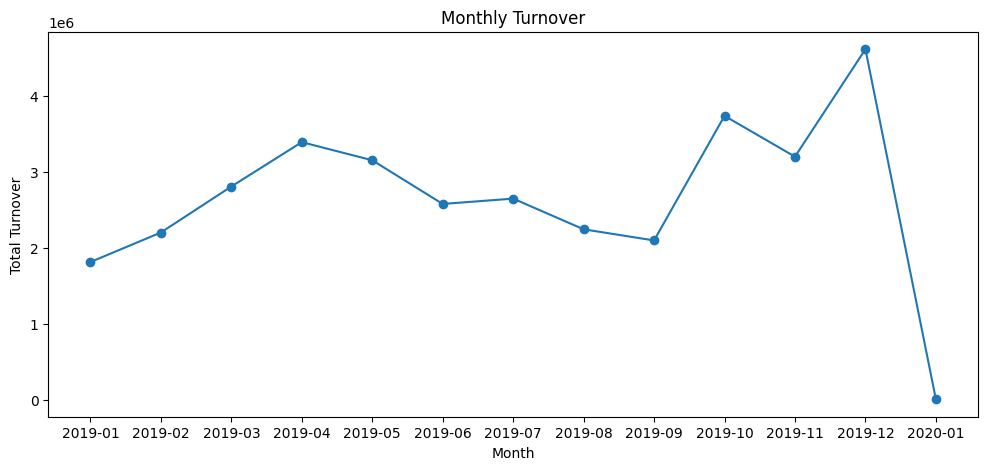

In [51]:
# Line plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_turnover['Month'], monthly_turnover['turnover'], marker='o', linestyle='-')
plt.title('Monthly Turnover')
plt.xlabel('Month')
plt.ylabel('Total Turnover')
plt.show()

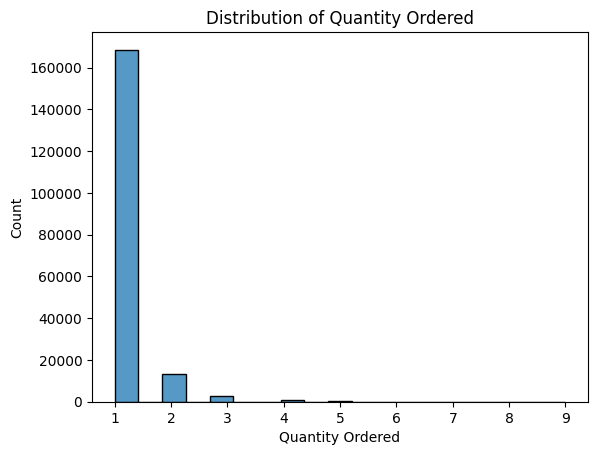

In [154]:
# 8.	Visualize the distribution of 'Quantity Ordered' using a histogram.

# Histplot
sns.histplot(df['Quantity Ordered'])
plt.title('Distribution of Quantity Ordered')
plt.show()

In [67]:
# 9.	Calculate and display the correlation matrix between 'Quantity Ordered', 'Price Each' and 'turnover'.
#     ' Visualize the correlation matrix using a heatmap.

corr_matrix = df[['Quantity Ordered', 'Price Each', 'turnover']].corr()
corr_matrix

,Quantity Ordered,Price Each,turnover
Quantity Ordered,1.000000,-0.148272,-0.139417
Price Each,-0.148272,1.000000,0.999203
turnover,-0.139417,0.999203,1.000000


<AxesSubplot: >

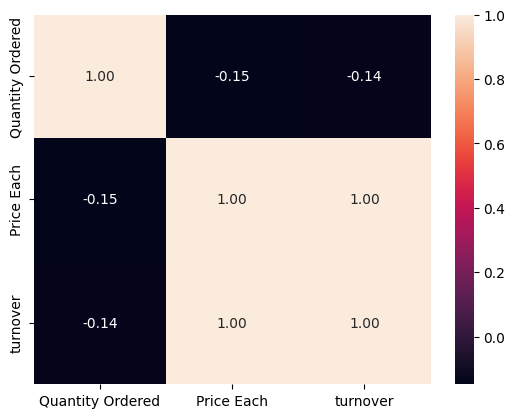

In [71]:
# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

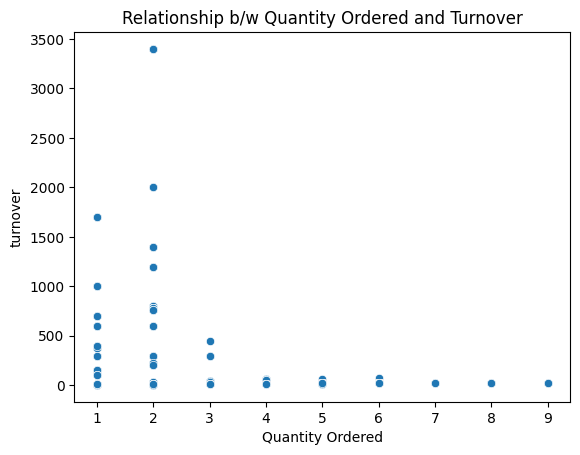

In [155]:
# 10.	Create a scatter plot to investigate the relationship between 'Quantity Ordered' and 'turnover'.

# Scatter plot
sns.scatterplot(df, x='Quantity Ordered', y='turnover')
plt.title('Relationship b/w Quantity Ordered and Turnover')
plt.show()

In [182]:
# 11.	Identify the top 5 products with the highest profit margin. Display the results in a bar chart.

x11=df.groupby('Product')['margin'].mean().to_frame().reset_index()
res11=x11.sort_values(by='margin', ascending=False).head()
res11

,Product,margin
13,Macbook Pro Laptop,1139.964437
14,ThinkPad Laptop,670.317909
18,iPhone,469.479830
9,Google Phone,402.509321
10,LG Dryer,402.000000


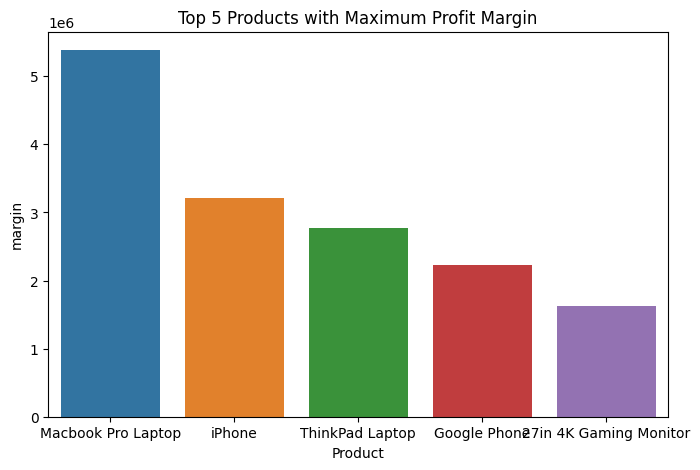

In [156]:
# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(res11, x='Product', y='margin')
plt.title('Top 5 Products with Maximum Profit Margin')
plt.show()

<AxesSubplot: xlabel='margin'>

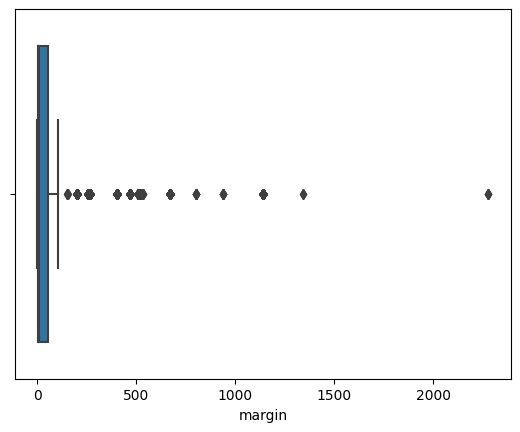

In [90]:
# 12.	Explore the distribution of 'margin' using a box plot.

# Box plot
sns.boxplot(df, x='margin')

In [94]:
# 13.	Calculate the average 'Cost price' for each category. Create a bar chart to compare the average cost price across categories.

x13=df.groupby('catégorie')['Cost price'].mean().reset_index()
x13

,catégorie,Cost price
0,Alimentation,69.925481
1,Sports,69.534650
2,Vêtements,69.476775
3,Électronique,69.739467


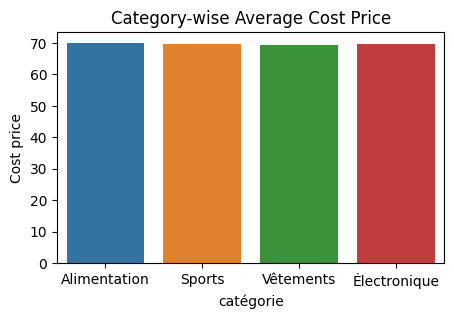

In [158]:
# Bar plot
plt.figure(figsize=(5,3))
sns.barplot(x13, x='catégorie', y='Cost price')
plt.title('Category-wise Average Cost Price')
plt.show()

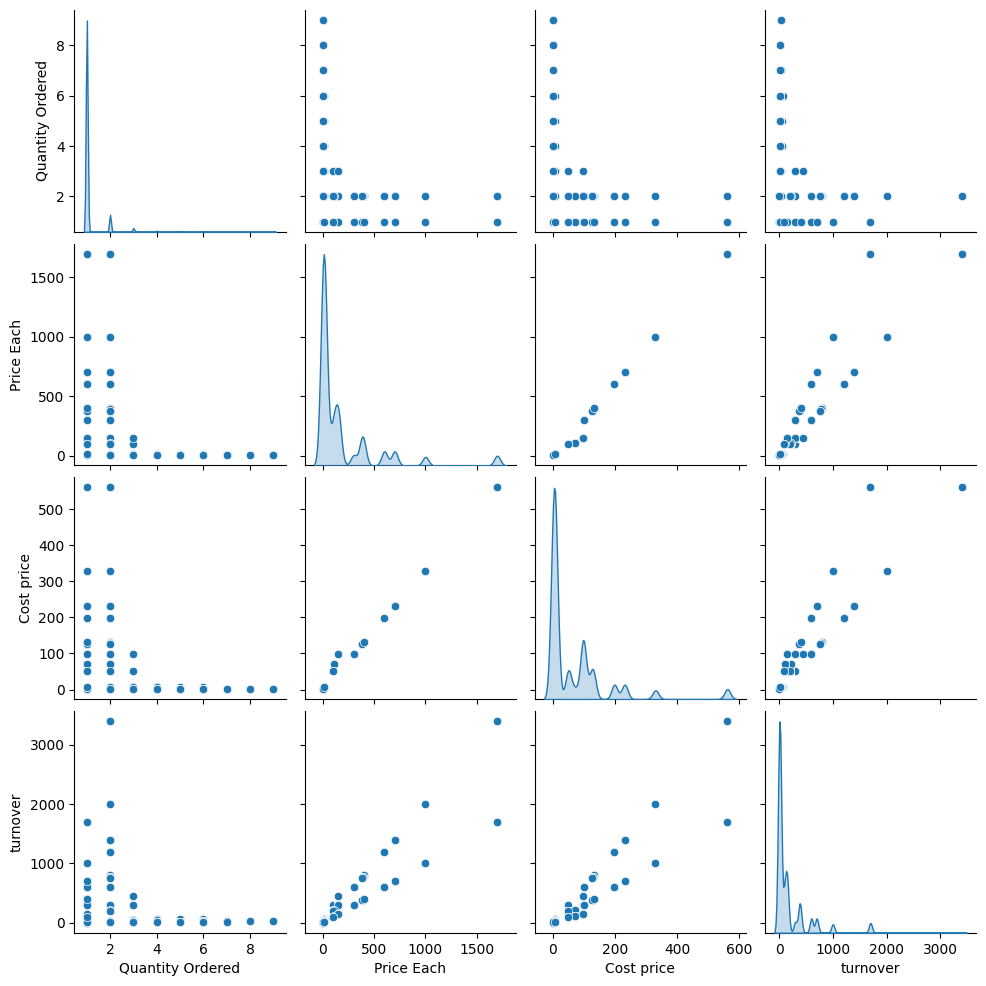

In [99]:
# 14.	Create a pair plot (scatterplot matrix) to visualize relationships between 'Quantity Ordered','Price Each','Cost price' and 'turnover'.

x14=df[['Quantity Ordered','Price Each','Cost price','turnover']]

# Pair plot
sns.pairplot(x14, diag_kind='kde', markers='o')
plt.show()

In [104]:
# 15.	Calculate and visualize the total turnover for each year.

x15=df.groupby(df['Order Date'].dt.to_period('Y'))['turnover'].sum().reset_index()
x15

,Order Date,turnover
0,2019,34483365.68
1,2020,8670.29


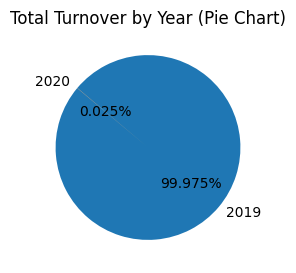

In [111]:
# Pie chart
plt.figure(figsize=(3,3))
plt.pie(x15['turnover'], labels=x15['Order Date'].dt.year, autopct='%1.3f%%', startangle=140)
plt.title('Total Turnover by Year (Pie Chart)')
plt.show()

In [124]:
# 16.	Identify the month with the highest turnover and display it along with the turnover value.

x16=df.groupby(df['Order Date'].dt.strftime('%B'))['turnover'].sum().reset_index()
x16.rename(columns={'Order Date':'Order_month'}, inplace=True)
x16=x16.sort_values('turnover', ascending=False)
x16.head(1)

,Order_month,turnover
2,December,4613443.34


In [ ]:
# 17.	Calculate and display the total turnover for each city. You can extract the city from the 'Purchase Address' column.

def get_city(x):
    y=x.split(',')[1]
    return y.strip()

In [143]:
a='14 Madison St, San Francisco, CA 94016'
get_city(a)

'San Francisco'

In [144]:
df['City']=df['Purchase Address'].apply(lambda x: get_city(x))

In [150]:
x17=df.groupby('City')['turnover'].sum().reset_index()
res17=x17.sort_values('turnover', ascending=False)
res17

,City,turnover
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


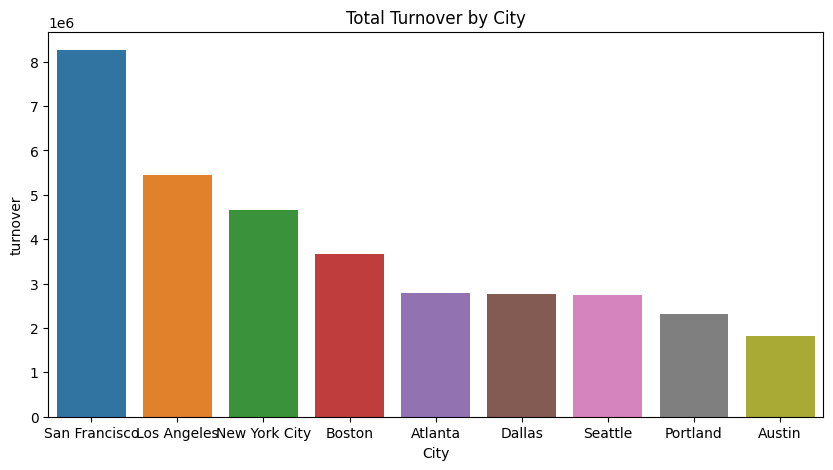

In [159]:
# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(res17, x='City', y='turnover')
plt.title('Total Turnover by City')
plt.show()

In [162]:
# 18.	Explore the relationship between 'Quantity Ordered' and 'Price Each' by creating a scatter plot with a regression line.

x18=df[['Quantity Ordered', 'Price Each']]
x18.head()

,Quantity Ordered,Price Each
0,1,700.00
1,1,14.95
2,2,11.99
3,1,149.99
4,1,11.99


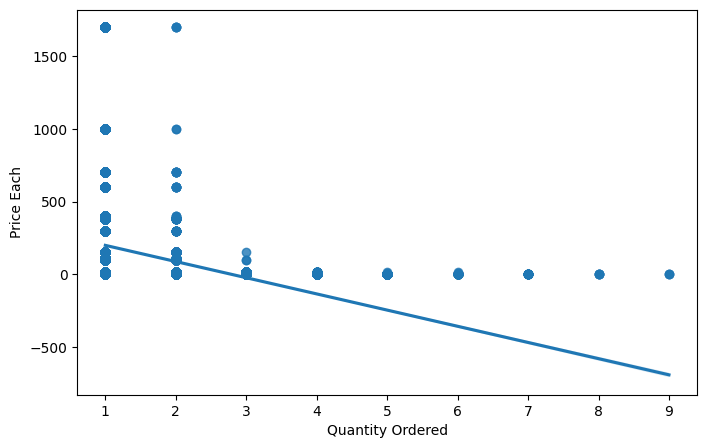

In [164]:
# Scatter plot with Regression line
plt.figure(figsize=(8,5))
sns.regplot(x18, x='Quantity Ordered', y='Price Each')
plt.show()

In [178]:
# 19.	Calculate and visualize the turnover by day of the week.

x19=df.groupby(df['Order Date'].dt.day_name())['turnover'].sum().reset_index()
x19.rename(columns={'Order Date': 'Day_of_week'}, inplace=True)

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
res19 = x19.sort_values(by='Day_of_week', key=lambda x: x.map({d: i for i, d in enumerate(day_order)}))
res19

,Day_of_week,turnover
1,Monday,4883326.72
5,Tuesday,5087956.78
6,Wednesday,4988822.26
4,Thursday,4839465.16
0,Friday,4855938.38
2,Saturday,4904357.01
3,Sunday,4932169.66


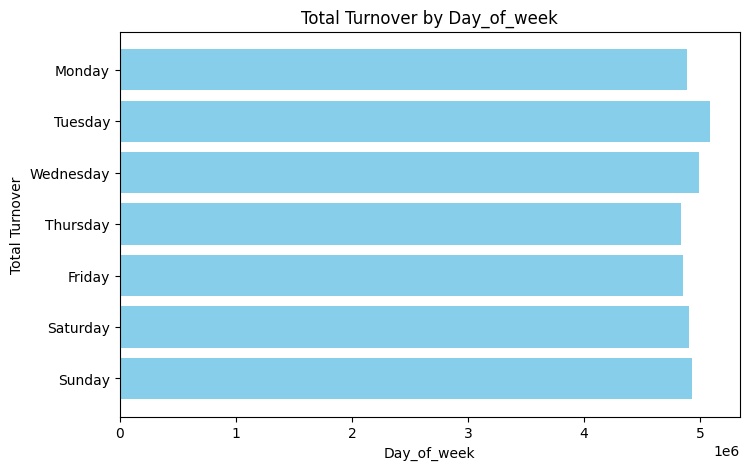

In [179]:
# Horizontal bar chart -using matplotlib
plt.figure(figsize=(8,5))
plt.barh(res19['Day_of_week'], res19['turnover'], color='skyblue')
plt.title('Total Turnover by Day_of_week')
plt.xlabel('Day_of_week')
plt.ylabel('Total Turnover')
plt.gca().invert_yaxis()  # Inverted the y-axis to display the highest quantity at the top
plt.show()

In [ ]:
# 20.	Generate 10 insight different from above questions

# Insights:
#     a).Highest number of products were ordered in December 2019.
#     b).Total turnover is maximum for sports category.
#     c).AAA Batteries (4-pack) is the top product in demand wise.
#     d).Minimum to maximum price range of products varies in the range of 3 to 1700.
#     e).Price of each product is highly correlated with the cost price and turnover.
#     f).Macbook Pro Laptop is top product in terms of profit margin.
#     g).San Francisco is generating the highest revenue/turnover out of all the cities.
#     h).In terms of week of day, turnover is highest on wednesday.
#     i).There are total 4-categories, 19-products and 9-different cities.
#     j).Total turnover in 2019 was 3.45unit.


In [189]:
# Total turnover
df['turnover'].sum()
df[df['Order Date'].dt.year==2019]['turnover'].sum()
df[df['Order Date'].dt.year==2020]['turnover'].sum()

8670.29

In [180]:
df.columns

Index(['Order Date', 'Order ID', 'Product', 'Product_ean', 'catégorie',
       'Purchase Address', 'Quantity Ordered', 'Price Each', 'Cost price',
       'turnover', 'margin', 'City'],
      dtype='object')

In [181]:
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,City
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,Boston
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,Portland
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,San Francisco
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,Los Angeles
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,Austin
